In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from ydata_profiling import ProfileReport

d:\Training\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('ames_synthetic_100k.csv')
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,485805,120,FV,102.0,10075,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,12,2007,Con,Family
1,311740,60,FV,103.0,9471,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,ConLw,Normal
2,417409,120,RL,NaN,6067,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,3,2008,WD,Normal
3,278092,80,RL,83.0,14481,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2010,WD,Normal
4,615326,20,RL,92.0,8011,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
df.drop(columns= ['Alley', 'FireplaceQu', 'PoolQC', 'MiscFeature'], inplace=True)
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,485805,120,FV,102.0,10075,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,MnWw,0,12,2007,Con,Family
1,311740,60,FV,103.0,9471,Pave,IR2,Lvl,AllPub,Inside,...,6,0,0,0,MnPrv,0,7,2006,ConLw,Normal
2,417409,120,RL,NaN,6067,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,MnWw,0,3,2008,WD,Normal
3,278092,80,RL,83.0,14481,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,0,11,2010,WD,Normal
4,615326,20,RL,92.0,8011,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,0,11,2006,WD,Normal


In [5]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Fill missing values (simple approach)
X = X.fillna(X.median(numeric_only=True))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2_score}")

Mean Squared Error: 8324011142.028373
R2 Score: 0.44470069482855734


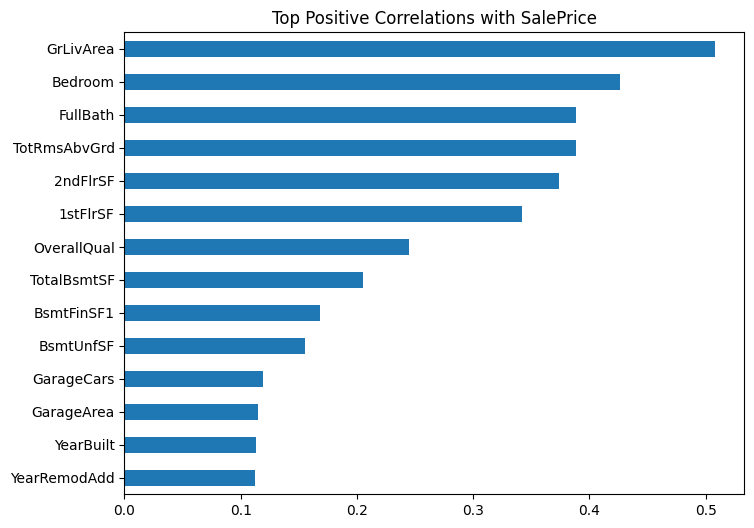

In [88]:
numeric_df = df.select_dtypes(include=["int64","float64"])
corr = numeric_df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr.head(15).iloc[1:].sort_values().plot(kind="barh")
plt.title("Top Positive Correlations with SalePrice")
plt.show()

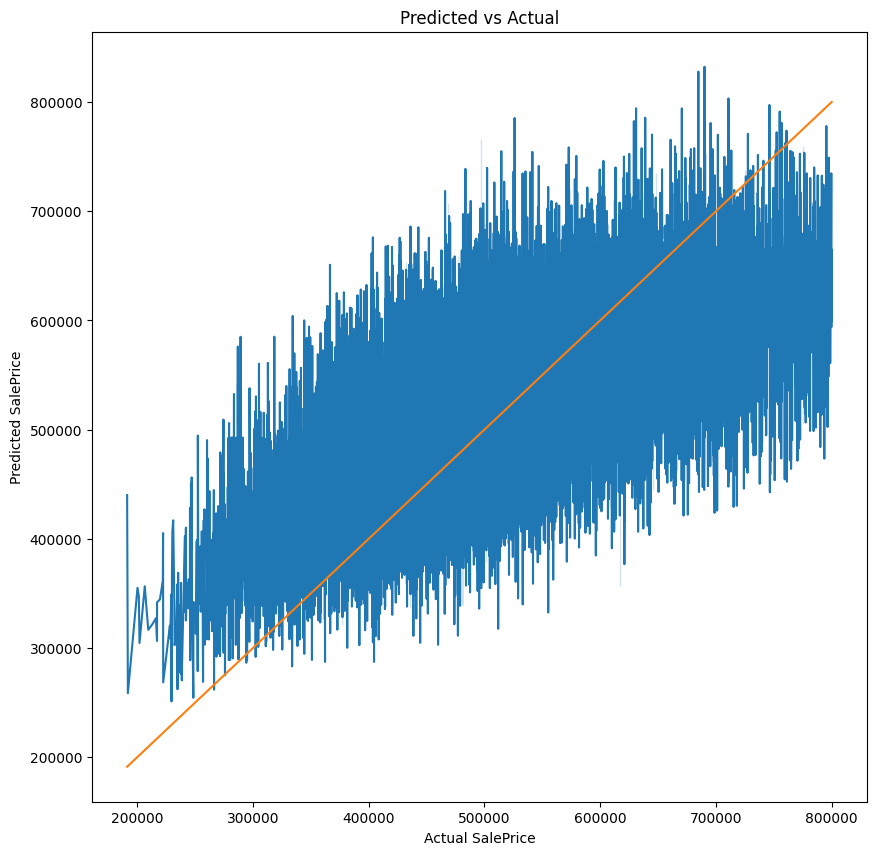

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.title(f"Predicted vs Actual")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()